In [ ]:
!pip install catboost
!pip install ptitprince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.8 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10656 sha256=d71d31ce378de218c885c8b6001c2cb588d1324e4a387696ac2b01770118a920
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, explained_variance_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from scipy.special import inv_boxcox
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
from scipy.stats import boxcox
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV
import ptitprince as pt





# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Train.csv')
df.head(2).T

,0,1
ID,ID_GTFAC7PEVWQ9,ID_TK40ARLSPOKS
District,Nalanda,Nalanda
Block,Noorsarai,Rajgir
CultLand,45,26
CropCultLand,40,26
LandPreparationMethod,TractorPlough FourWheelTracRotavator,WetTillagePuddling TractorPlough FourWheelTrac...
CropTillageDate,2022-07-20,2022-07-18
CropTillageDepth,5,5
CropEstMethod,Manual_PuddledRandom,Manual_PuddledRandom
RcNursEstDate,2022-06-27,2022-06-20


In [ ]:
# check for basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [ ]:
# Descriptive stats on the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CultLand,3870.0,28.527907,30.454218,1.000000,12.00000,20.000000,35.00000,800.0000
CropCultLand,3870.0,24.727132,27.994802,1.000000,10.00000,20.000000,30.00000,800.0000
CropTillageDepth,3870.0,4.488372,1.133044,1.000000,4.00000,4.000000,5.00000,8.0000
SeedlingsPerPit,3581.0,2.706507,7.624397,1.000000,2.00000,2.000000,3.00000,442.0000
TransplantingIrrigationHours,3677.0,8.017677,42.612470,1.000000,2.00000,4.000000,6.00000,2000.0000
TransIrriCost,2988.0,379.726908,419.724782,1.000000,150.00000,250.000000,450.00000,6000.0000
StandingWater,3632.0,3.247522,2.207276,1.000000,2.00000,3.000000,4.00000,15.0000
Ganaura,1453.0,29.731590,122.680882,1.000000,1.00000,3.000000,4.00000,1400.0000
CropOrgFYM,1196.0,57.445652,328.251615,1.000000,1.00000,2.000000,5.00000,4000.0000
NoFertilizerAppln,3870.0,2.184496,0.634632,1.000000,2.00000,2.000000,3.00000,4.0000


In [ ]:
# check for duplicated records
df.duplicated().sum()

0

In [ ]:
# percentage of missing values
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

# Drop columns with more 50% missing values
large_missing_data_columns = missing_data_percentage[missing_data_percentage > 50].index.tolist()

print(missing_data_percentage)

df.drop(columns=large_missing_data_columns, inplace=True)


ID                                     0.000000
District                               0.000000
Block                                  0.000000
CultLand                               0.000000
CropCultLand                           0.000000
LandPreparationMethod                  0.000000
CropTillageDate                        0.000000
CropTillageDepth                       0.000000
CropEstMethod                          0.000000
RcNursEstDate                          2.144703
SeedingSowingTransplanting             0.000000
SeedlingsPerPit                        7.467700
NursDetFactor                          7.467700
TransDetFactor                         7.467700
TransplantingIrrigationHours           4.987080
TransplantingIrrigationSource          2.971576
TransplantingIrrigationPowerSource    12.997416
TransIrriCost                         22.790698
StandingWater                          6.149871
OrgFertilizers                        34.496124
Ganaura                               62

In [ ]:
# Remove negative values
#df['CropDuration'] = df['CropDuration'].apply(lambda x: max(x, 0))
#df['NurseryPreparationTime'] = df['NurseryPreparationTime'].apply(lambda x: max(x, 0))

# Replace 'nan' values with 'None' in categorical columns
categorical_columns = ['OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'FirstTopDressFert']

df[categorical_columns] = df[categorical_columns].fillna('None')

# # Convert 'ID' to numeric feature
# df['ID'] = df['ID'].apply(lambda x: int(x.split('_')[1]))

# Handle 'nan' values in 'TransplantingIrrigationSource' and 'TransplantingIrrigationPowerSource'
df['TransplantingIrrigationSource'] = df['TransplantingIrrigationSource'].fillna('Unknown')
df['TransplantingIrrigationPowerSource'] = df['TransplantingIrrigationPowerSource'].fillna('Unknown')

# Feature engineering
# Extract year, month, and day
date_columns = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date']

# for col in date_columns:
#     df[col + '_Year'] = pd.to_datetime(df[col]).dt.year
#     df[col + '_Month'] = pd.to_datetime(df[col]).dt.month
#     df[col + '_Day'] = pd.to_datetime(df[col]).dt.day

# Create new features
#df['FertilizerRatio'] = df['TotalFertilizerAmount'] / df['CropCultLand']
#df['YieldPerDay'] = df['Yield'] / df['CropDuration']
#df['ResidueToYieldRatio'] = df['CropResidueAmount'] / df['Yield']
#df['IrrigationCostPerHour'] = df['TransplantingIrrigationCost'] / df['TransplantingIrrigationHours']




In [ ]:
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_percentage

ID                                     0.000000
District                               0.000000
Block                                  0.000000
CultLand                               0.000000
CropCultLand                           0.000000
LandPreparationMethod                  0.000000
CropTillageDate                        0.000000
CropTillageDepth                       0.000000
CropEstMethod                          0.000000
RcNursEstDate                          2.144703
SeedingSowingTransplanting             0.000000
SeedlingsPerPit                        7.467700
NursDetFactor                          7.467700
TransDetFactor                         7.467700
TransplantingIrrigationHours           4.987080
TransplantingIrrigationSource          0.000000
TransplantingIrrigationPowerSource     0.000000
TransIrriCost                         22.790698
StandingWater                          6.149871
OrgFertilizers                         0.000000
PCropSolidOrgFertAppMethod             0

In [ ]:
df_2 = df.copy()

In [ ]:
# values imputation: mean for numeric and mode for object
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
for column in columns_with_missing_values:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        if df[column].dtype == 'float64':
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(int(df[column].mean()), inplace=True)

In [ ]:
df = df.drop(columns=date_columns)

In [ ]:
df.head(2).T

,0,1
ID,ID_GTFAC7PEVWQ9,ID_TK40ARLSPOKS
District,Nalanda,Nalanda
Block,Noorsarai,Rajgir
CultLand,45,26
CropCultLand,40,26
LandPreparationMethod,TractorPlough FourWheelTracRotavator,WetTillagePuddling TractorPlough FourWheelTrac...
CropTillageDepth,5,5
CropEstMethod,Manual_PuddledRandom,Manual_PuddledRandom
SeedlingsPerPit,2.0,2.0
NursDetFactor,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate PreMonsoonShowers IrrigWaterAvail...


In [ ]:
# # converting columns with date to right format
# date_columns = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date']
# for col in date_columns:
#     df[col] = pd.to_datetime(df[col])

# # Check the converted columns
# df[date_columns].info()


In [ ]:
column = ['ID', 'Block', 'TransplantingIrrigationPowerSource', 'MineralFertAppMethod.1', 'Harv_method',
         'TransplantingIrrigationSource',  'CropEstMethod', 'Threshing_method',
          'NursDetFactor', 'OrgFertilizers', 'Stubble_use', 'District', 'FirstTopDressFert',
          'PCropSolidOrgFertAppMethod', 'Residue_perc', 'CropTillageDepth', 'LandPreparationMethod', 'TransDetFactor']


['MineralFertAppMethod', 'NoFertilizerAppln', 'BasalDAP', 'CropDuration']

['MineralFertAppMethod', 'NoFertilizerAppln', 'BasalDAP', 'CropDuration']

In [ ]:
df['TotalCost'] = df['TransIrriCost'] + df['Harv_hand_rent']
#df['CropProdDate'] =  df['Harv_date'] - df['CropTillageDate']
#df['NursPrepTime'] =  df['SeedingSowingTransplanting'] - df['RcNursEstDate']
df['TotalBasalUsed'] = df['BasalDAP'] + df['BasalUrea']
df['CostPerAcre'] = df['TotalCost'] / df['Acre']

# Drop redundant columns
redundant_columns = ['TransIrriCost', 'Harv_hand_rent',
                       'BasalDAP',
                     'BasalUrea', 'NoFertilizerAppln', 'MineralFertAppMethod']

df.drop(columns=redundant_columns, inplace=True)

In [ ]:
df.head(2).T

,0,1
ID,ID_GTFAC7PEVWQ9,ID_TK40ARLSPOKS
District,Nalanda,Nalanda
Block,Noorsarai,Rajgir
CultLand,45,26
CropCultLand,40,26
LandPreparationMethod,TractorPlough FourWheelTracRotavator,WetTillagePuddling TractorPlough FourWheelTrac...
CropTillageDepth,5,5
CropEstMethod,Manual_PuddledRandom,Manual_PuddledRandom
SeedlingsPerPit,2.0,2.0
NursDetFactor,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate PreMonsoonShowers IrrigWaterAvail...


## Exploratory Data Analysis

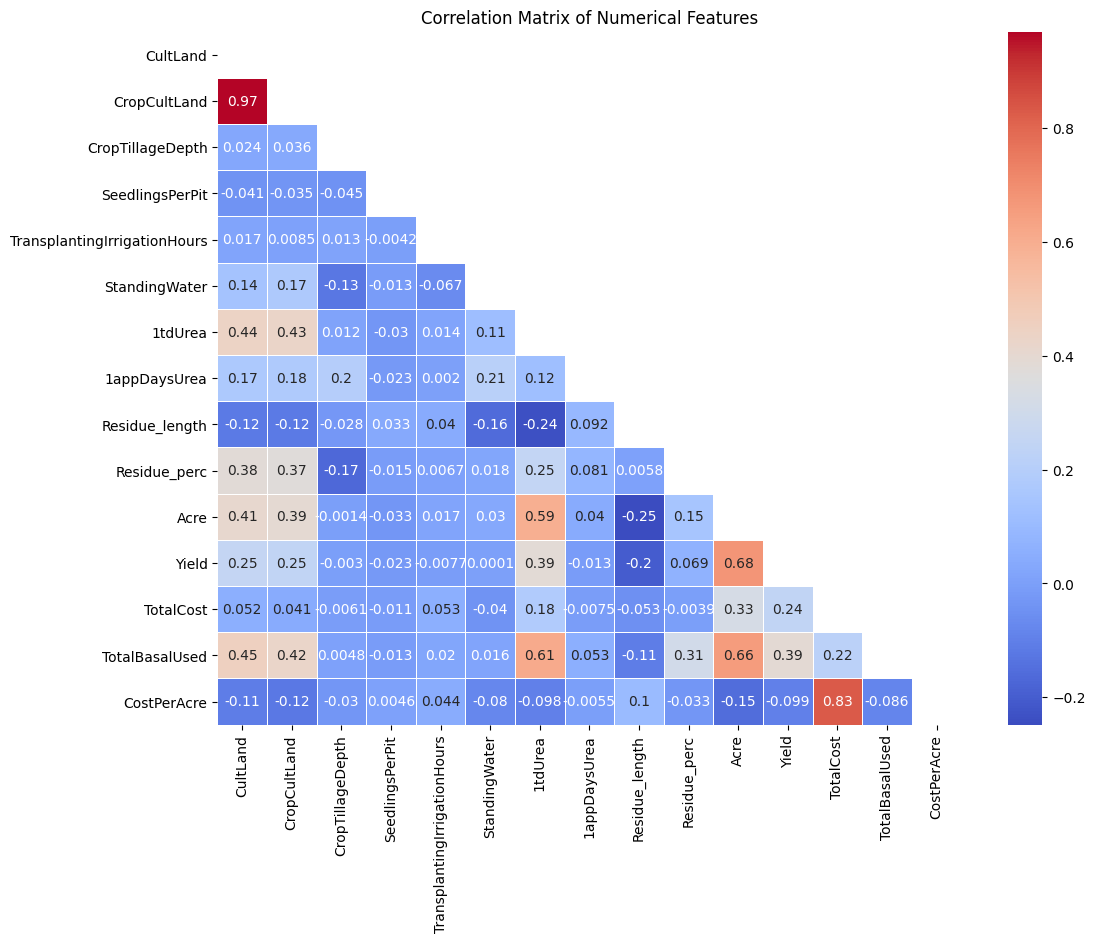

In [ ]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()


# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm", mask=mask)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

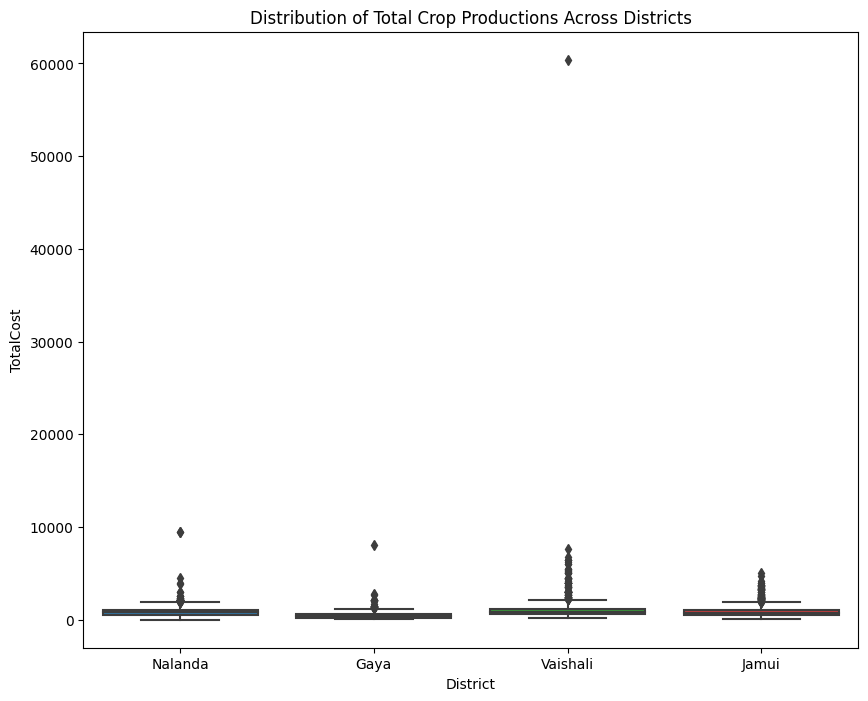

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='District', y='TotalCost')
plt.title('Distribution of Total Crop Productions Across Districts')
plt.show()

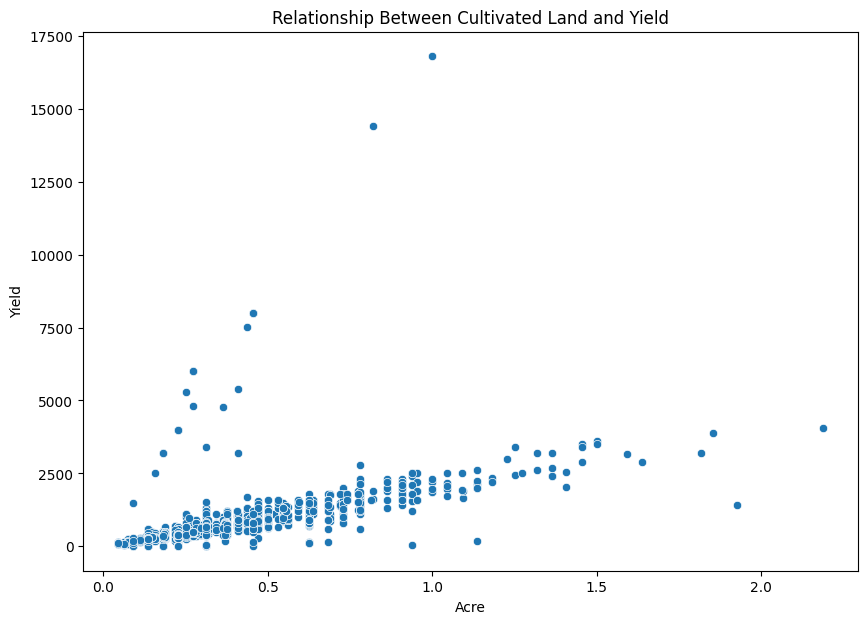

In [ ]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=df, x='Acre', y='Yield')
plt.title('Relationship Between Cultivated Land and Yield')
plt.show()

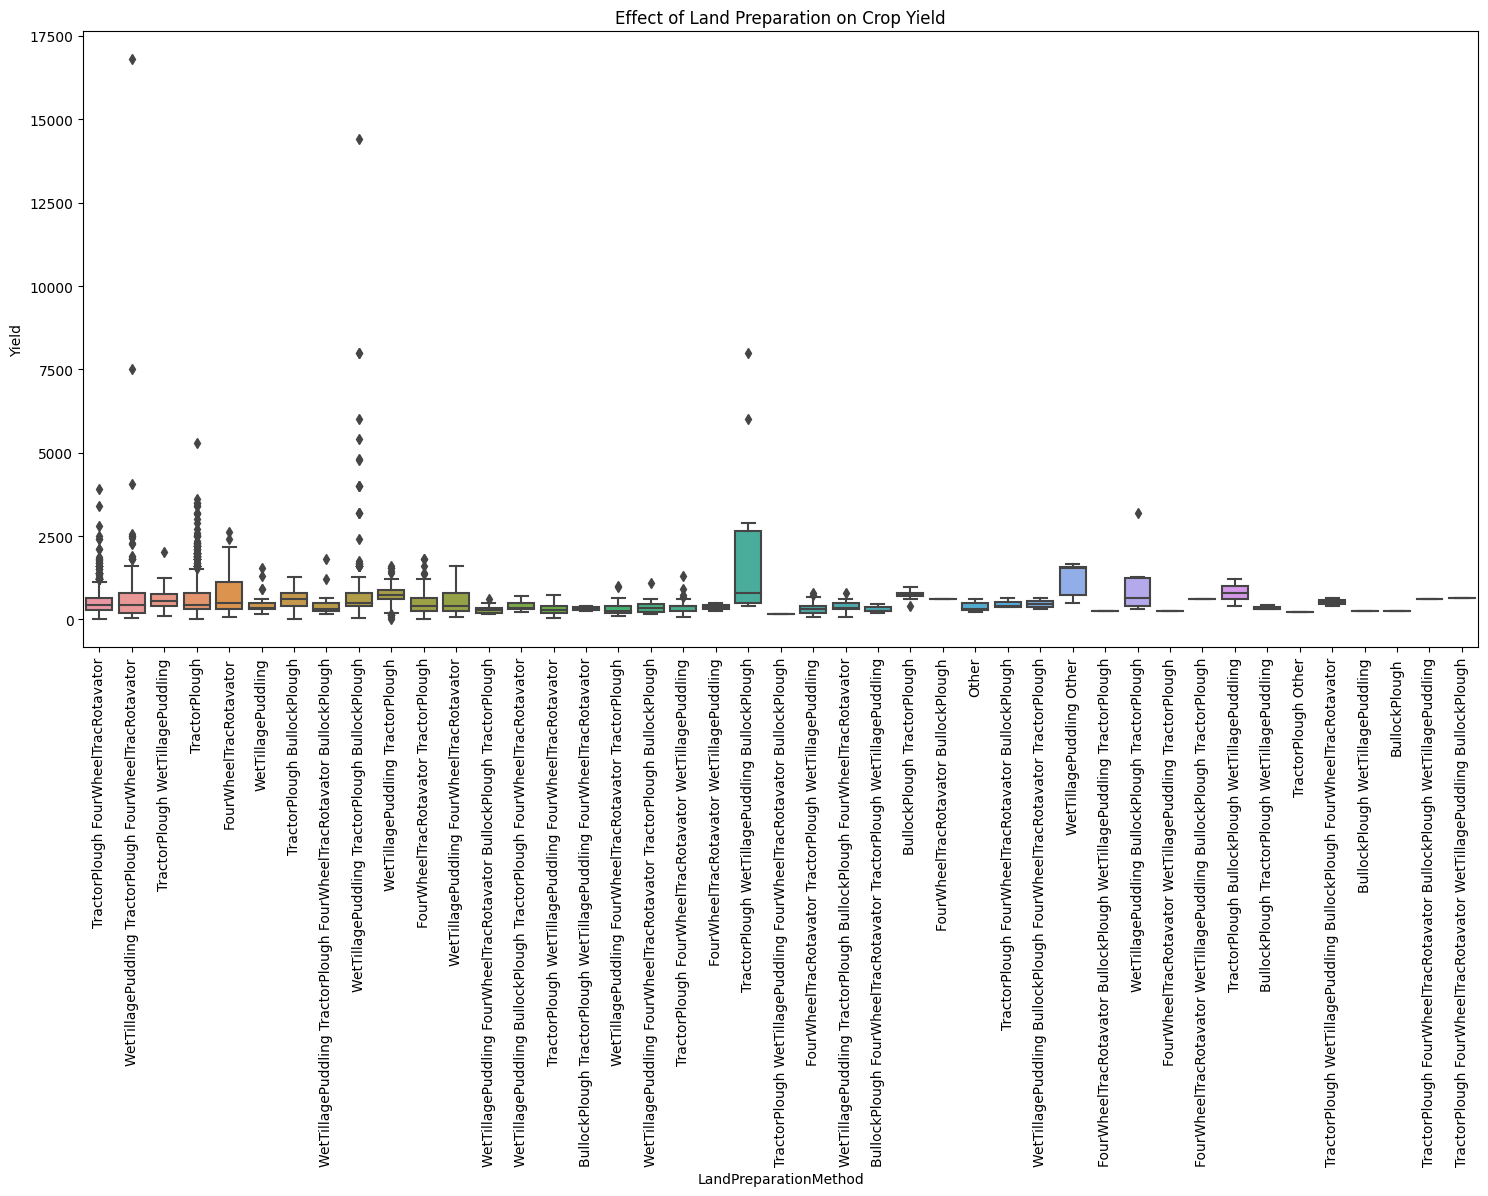

In [ ]:
plt.figure(figsize=[18,8])
sns.boxplot(data=df, x='LandPreparationMethod', y='Yield')
plt.title("Effect of Land Preparation on Crop Yield")
plt.xticks(rotation=90)
plt.show()

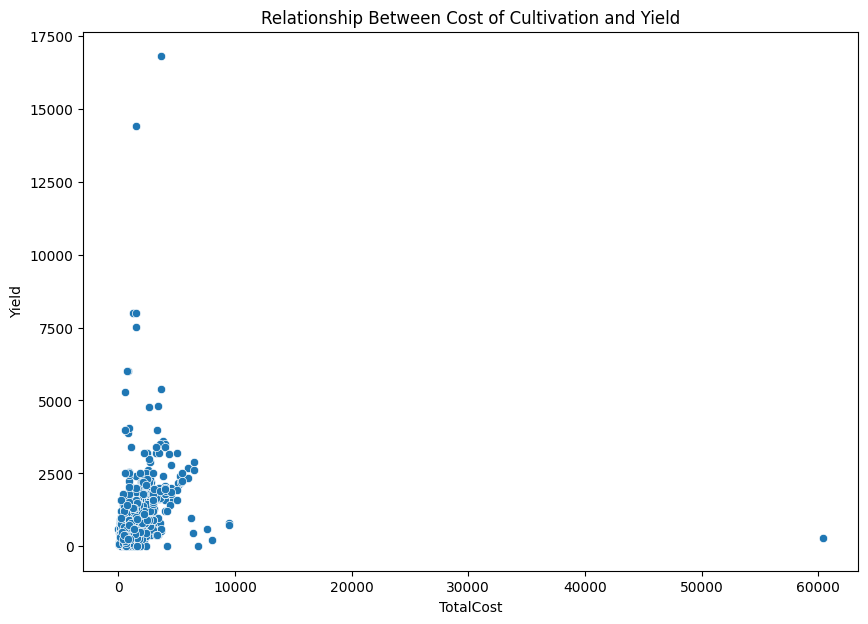

In [ ]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=df, x='TotalCost', y='Yield')
plt.title('Relationship Between Cost of Cultivation and Yield')
plt.show()

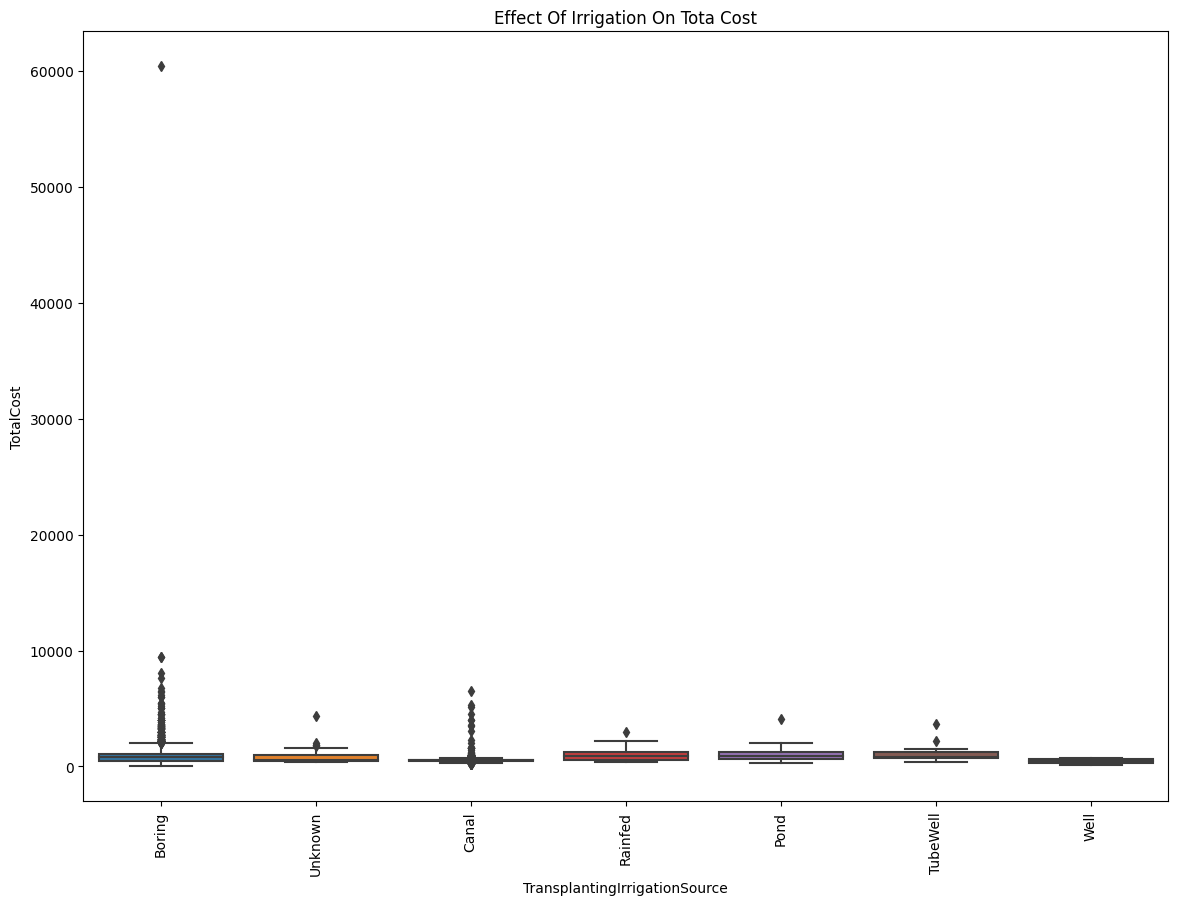

In [ ]:
plt.figure(figsize=[14,10])
sns.boxplot(data=df, x='TransplantingIrrigationSource', y='TotalCost')
plt.title("Effect Of Irrigation On Tota Cost")
plt.xticks(rotation=90)
plt.show()

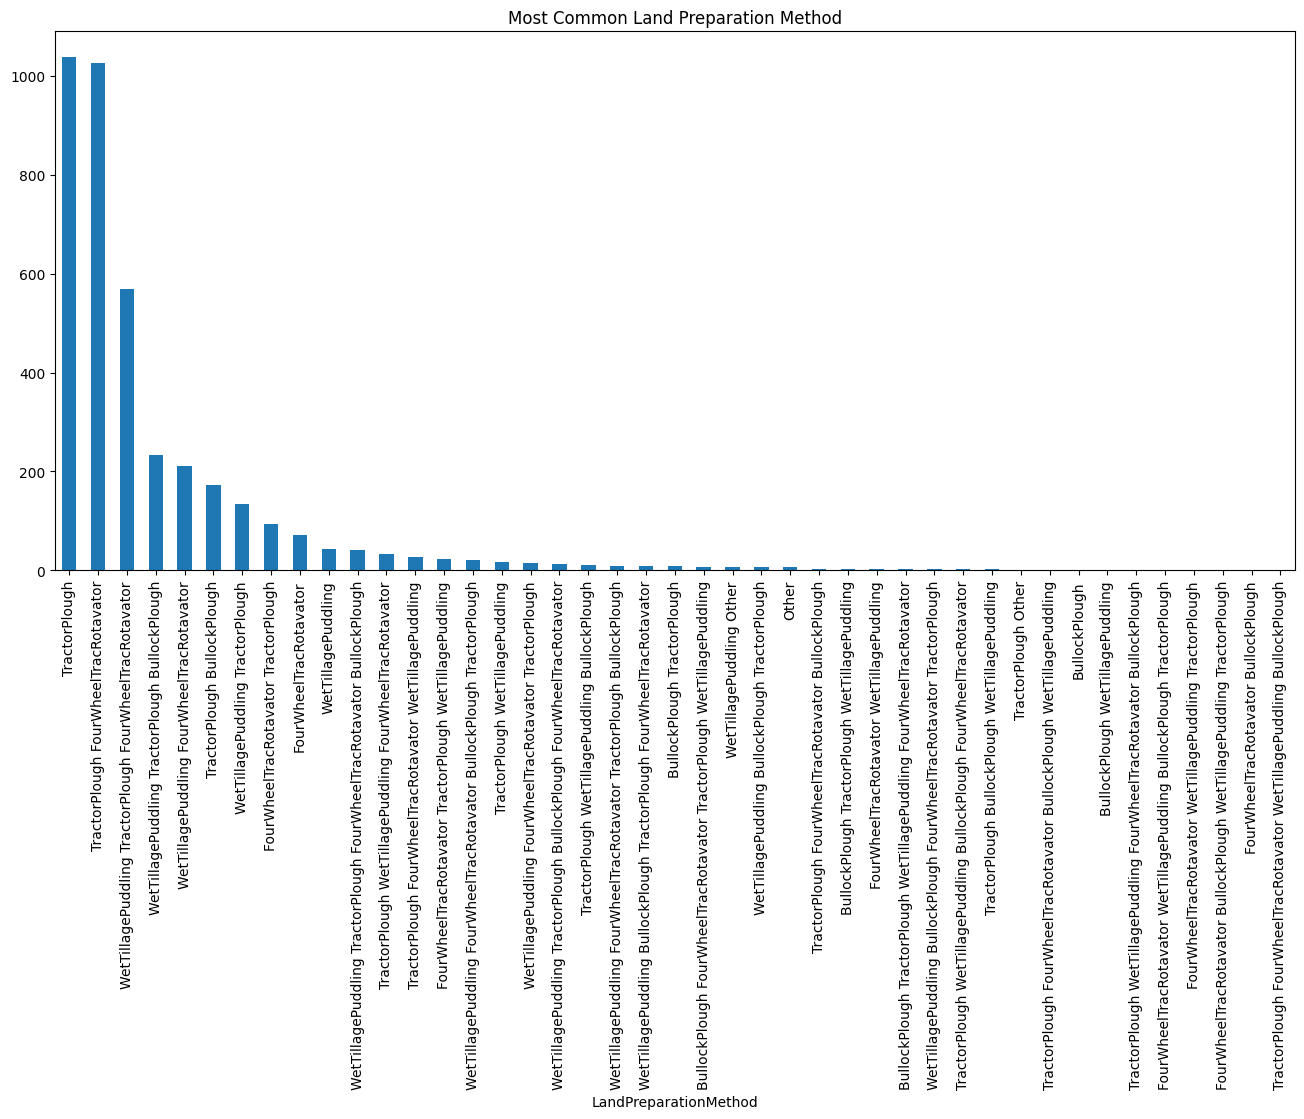

In [ ]:
plt.figure(figsize=[16,7])
df['LandPreparationMethod'].value_counts().plot(kind='bar', title='Most Common Land Preparation Method')
plt.show()

In [ ]:
avg_yld_perdist = df.groupby('District')['Yield'].mean()
avg_yld_perdist

District
Gaya        571.031579
Jamui       730.193434
Nalanda     677.198659
Vaishali    350.518367
Name: Yield, dtype: float64

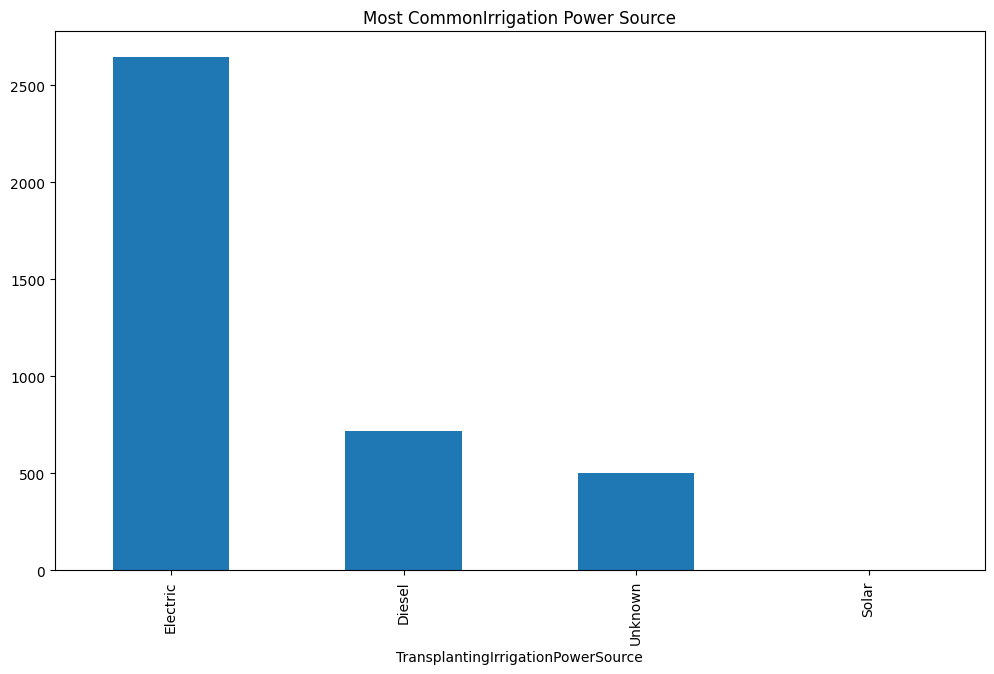

In [ ]:
plt.figure(figsize=[12,7])
df['TransplantingIrrigationPowerSource'].value_counts().plot(kind='bar', title='Most CommonIrrigation Power Source')
plt.show()

In [ ]:
df = df.drop(columns='ID')
df.var()

TypeError: could not convert string to float: 'Nalanda'

In [ ]:
df.kurtosis()

TypeError: could not convert string to float: 'ID_GTFAC7PEVWQ9'

In [ ]:
df.skew()

TypeError: could not convert string to float: 'ID_GTFAC7PEVWQ9'

In [ ]:
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# df[['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
#        'TransplantingIrrigationHours', 'StandingWater', '1tdUrea',
#        '1appDaysUrea', 'Residue_length', 'Residue_perc', 'Acre', 'Yield',
#        'TotalCost', 'TotalBasalUsed', 'CostPerAcre']] = pd.DataFrame(scaler.fit_transform(df[['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
#        'TransplantingIrrigationHours', 'StandingWater', '1tdUrea',
#        '1appDaysUrea', 'Residue_length', 'Residue_perc', 'Acre', 'Yield',
#        'TotalCost', 'TotalBasalUsed', 'CostPerAcre']]), columns=df[['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
#        'TransplantingIrrigationHours', 'StandingWater', '1tdUrea',
#        '1appDaysUrea', 'Residue_length', 'Residue_perc', 'Acre', 'Yield',
#        'TotalCost', 'TotalBasalUsed', 'CostPerAcre']].columns)

In [ ]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        df[i] = np.log(df[i])

In [ ]:
# # Define a function to apply Box-Cox transformation
# def apply_boxcox(col):
#     # Adding a small positive value to avoid issues with zero or negative values
#     col += abs(col.min()) + 1e-5
#     transformed_col, _ = boxcox(col)
#     return transformed_col

# # Define a function to apply log transformation
# def apply_log(col):
#     # Adding a small positive value to avoid issues with zero or negative values
#     col += abs(col.min()) + 1e-5
#     return np.log(col)

# df['CultLand'] = apply_boxcox(df['CultLand'])
# df['CropCultLand'] = apply_boxcox(df['CropCultLand'])
# df['SeedlingsPerPit'] = apply_boxcox(df['CultLand'])
# df['TransplantingIrrigationHours'] = apply_boxcox(df['CropCultLand'])
# df['TotalBasalUsed'] = apply_boxcox(df['TotalBasalUsed'])
# df['CostPerAcre'] = apply_boxcox(df['CostPerAcre'])
# df['1appDaysUrea'] = apply_boxcox(df['1appDaysUrea'])
# df['TotalCost'] = apply_boxcox(df['TotalCost'])
# df['Yield'] = apply_boxcox(df['Yield'])


In [ ]:
# df['CultLand'] = np.log(df['CultLand'])

In [ ]:
df.var()

TypeError: could not convert string to float: 'Nalanda'

In [ ]:
df.kurtosis()

TypeError: could not convert string to float: 'Nalanda'

In [ ]:
df.skew()

TypeError: could not convert string to float: 'Nalanda'

In [ ]:
df.head(2).T

In [ ]:
s = ['Stubble_use', 'Threshing_method', 'Harv_method']


dummy = ['MineralFertAppMethod.1', 'FirstTopDressFert', 'CropbasalFerts', 'TransplantingIrrigationPowerSource']

In [ ]:
df.columns

Index(['District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDepth', 'CropEstMethod',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'StandingWater', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'FirstTopDressFert',
       '1tdUrea', '1appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Residue_length', 'Residue_perc', 'Stubble_use',
       'Acre', 'Yield', 'TotalCost', 'TotalBasalUsed', 'CostPerAcre'],
      dtype='object')

In [ ]:
df['Threshing_method'].unique()

array(['machine', 'hand'], dtype=object)

In [ ]:
categorical_cols = [col for col in df.columns if df[col].dtype=='object']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [ ]:
df.head()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,...,Harv_method,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,TotalCost,TotalBasalUsed,CostPerAcre
0,2,6,3.806662,3.688879,18,1.609438,3,0.693147,10,47,...,1,1,3.401197,3.688879,1,-1.163151,6.396930,6.602075,3.448474,7.765226
1,2,7,3.258097,3.258097,41,1.609438,3,0.693147,24,47,...,0,1,3.178054,2.302585,1,-1.163151,6.396930,4.852030,3.218876,6.015181
2,0,2,2.302585,2.302585,18,1.791759,3,0.693147,95,133,...,0,1,3.401197,2.302585,1,-1.909543,5.416100,6.327937,2.853696,8.237479
3,0,2,2.708050,2.708050,18,1.791759,3,0.693147,24,47,...,0,0,3.258097,2.302585,1,-1.504077,6.148468,6.429279,2.197225,7.933356
4,2,6,4.094345,4.094345,24,1.386294,3,0.693147,10,150,...,1,1,3.178054,3.688879,1,-0.757686,6.309918,6.729373,3.806662,7.487059


In [ ]:
columns_to_drop = ['ID', 'District', 'Block',
    "MineralFertAppMethod1", "Residueperc", "CropEstMethod", "MineralFertAppMethod",
    "TransplantingIrrigationSource", "Threshingthe", "CropTillageDepth",
    "PCropSolidOrgFertAppMethod", "FirstTopDression", "NoFertilizerAppin",
    "LandPreparationMethod", "OrgFertilizers", "Stubbleuse", "1appDaysUrea",
    "NursDetFactor", "NurseryPreparationTime", "TransDetFactor"
]

# Filter out columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop specified columns
df = df.drop(columns=columns_to_drop)


In [ ]:
df.head()

,CultLand,CropCultLand,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationPowerSource,StandingWater,CropbasalFerts,FirstTopDressFert,1tdUrea,MineralFertAppMethod.1,Harv_method,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,TotalCost,TotalBasalUsed,CostPerAcre
0,3.806662,3.688879,0.693147,1.609438,1,0.693147,24,10,2.708050,0,1,1,3.401197,3.688879,1,-1.163151,6.396930,6.602075,3.448474,7.765226
1,3.258097,3.258097,0.693147,1.609438,1,1.098612,9,10,2.995732,0,0,1,3.178054,2.302585,1,-1.163151,6.396930,4.852030,3.218876,6.015181
2,2.302585,2.302585,0.693147,1.386294,1,0.693147,0,10,1.609438,1,0,1,3.401197,2.302585,1,-1.909543,5.416100,6.327937,2.853696,8.237479
3,2.708050,2.708050,0.693147,2.081649,3,1.177892,9,10,1.609438,0,0,0,3.258097,2.302585,1,-1.504077,6.148468,6.429279,2.197225,7.933356
4,4.094345,4.094345,0.693147,2.197225,1,0.693147,25,10,3.401197,0,1,1,3.178054,3.688879,1,-0.757686,6.309918,6.729373,3.806662,7.487059


In [ ]:
# df = pd.get_dummies(data=df, columns=dummy, drop_first=True)


In [ ]:
#df['Threshing_date'] = pd.to_numeric(df['Threshing_date']) / 10**9
#df['CropProdDate'] = pd.to_numeric(df['CropProdDate']) / 10**9
#df['NursPrepTime'] = pd.to_numeric(df['NursPrepTime']) / 10**9

# # Ensure all columns are of numeric type
# df = df.apply(pd.to_numeric, errors='ignore')

# df['Threshing_date'] = df['Threshing_date'].apply(pd.to_numeric, errors='ignore')
# df['CropProdDate'] = df['CropProdDate'].apply(pd.to_numeric, errors='ignore')
# df['NursPrepTime'] = df['NursPrepTime'].apply(pd.to_numeric, errors='ignore')

In [ ]:
df.head()

,CultLand,CropCultLand,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationPowerSource,StandingWater,CropbasalFerts,FirstTopDressFert,1tdUrea,MineralFertAppMethod.1,Harv_method,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,TotalCost,TotalBasalUsed,CostPerAcre
0,3.806662,3.688879,0.693147,1.609438,1,0.693147,24,10,2.708050,0,1,1,3.401197,3.688879,1,-1.163151,6.396930,6.602075,3.448474,7.765226
1,3.258097,3.258097,0.693147,1.609438,1,1.098612,9,10,2.995732,0,0,1,3.178054,2.302585,1,-1.163151,6.396930,4.852030,3.218876,6.015181
2,2.302585,2.302585,0.693147,1.386294,1,0.693147,0,10,1.609438,1,0,1,3.401197,2.302585,1,-1.909543,5.416100,6.327937,2.853696,8.237479
3,2.708050,2.708050,0.693147,2.081649,3,1.177892,9,10,1.609438,0,0,0,3.258097,2.302585,1,-1.504077,6.148468,6.429279,2.197225,7.933356
4,4.094345,4.094345,0.693147,2.197225,1,0.693147,25,10,3.401197,0,1,1,3.178054,3.688879,1,-0.757686,6.309918,6.729373,3.806662,7.487059


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CultLand                            3870 non-null   float64
 1   CropCultLand                        3870 non-null   float64
 2   SeedlingsPerPit                     3870 non-null   float64
 3   TransplantingIrrigationHours        3870 non-null   float64
 4   TransplantingIrrigationPowerSource  3870 non-null   int64  
 5   StandingWater                       3870 non-null   float64
 6   CropbasalFerts                      3870 non-null   int64  
 7   FirstTopDressFert                   3870 non-null   int64  
 8   1tdUrea                             3870 non-null   float64
 9   MineralFertAppMethod.1              3870 non-null   int64  
 10  Harv_method                         3870 non-null   int64  
 11  Threshing_method                    3870 no

In [ ]:
# threshold = 0.9

# # Absolute value correlation matrix
# corr_matrix = df.corr().abs()

# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# upper.head()


# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# print('There are %d columns to remove.' % (len(to_drop)))

In [ ]:
X = df.drop('Yield', axis=1)
y = df['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    num_features = len(X.columns)
    for i in range(num_features):
        X = sm.add_constant(X)  # Add a constant term (bias) for the intercept
        model = sm.OLS(y, X).fit()  # Fit the Ordinary Least Squares (OLS) regression model
        p_values = model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()  # Find the highest p-value among the features
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()  # Find the feature with the highest p-value
            X.drop(columns=[feature_to_remove], inplace=True)  # Remove the feature with the highest p-value
        else:
            break  # Exit the loop if all remaining features have p-values below the significance level
    return X, model

# Example usage:
# X: DataFrame of features, y: Series of target variable
# X_train, y_train = ...
# Perform backward elimination
X_optimal, model = backward_elimination(X_train, y_train)
print("Selected features after backward elimination:")
print(X_optimal.columns)
print("Summary of the final model:")
print(model.summary())

Selected features after backward elimination:
Index(['const', 'CultLand', 'CropCultLand', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransplantingIrrigationPowerSource',
       'CropbasalFerts', '1tdUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Residue_length', 'Residue_perc', 'Stubble_use',
       'Acre', 'TotalCost', 'CostPerAcre'],
      dtype='object')
Summary of the final model:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     340.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:35:12   Log-Likelihood:                -3071.5
No. Observations:                3096   AIC:                             6173.
Df Residuals: 

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

# Define the ExhaustiveFeatureSelector
efs = ExhaustiveFeatureSelector(
    model,
    min_features=1,
    max_features=len(X_train.columns),
    scoring='neg_mean_squared_error',
    print_progress=True,
    cv=5)
efs = efs.fit(X_train, y_train)

feature_indices = efs.best_idx_

# Get the selected features
selected_features = X_train.columns[list(feature_indices)]

# Print the selected features
print("Selected features:", selected_features)

y_pred = efs.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMRegressor(objective='regression', boosting_type='goss', n_estimators=10000, class_weight='balanced')

feature_importances = np.zeros(X.shape[1])

for i in range(2):
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=i)

    # Train using early stopping
    model.fit(
        train_features, train_y,
        eval_set=[(valid_features, valid_y)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(100, first_metric_only=True, verbose=True)]
    )

    # Record the feature importances
    feature_importances += model.feature_importances_


    # Make sure to average feature importances!
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

(feature_importances.head(30))



# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(30)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 2902, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_stra

,feature,importance
15,Acre,10.0
0,CultLand,3.0
17,TotalBasalUsed,3.0
16,TotalCost,2.0
12,Residue_length,2.0
8,1tdUrea,1.5
1,CropCultLand,1.5
18,CostPerAcre,1.5
5,StandingWater,1.5
3,TransplantingIrrigationHours,1.5


In [ ]:
feature_importances['feature']

15                                  Acre
0                               CultLand
17                        TotalBasalUsed
16                             TotalCost
12                        Residue_length
8                                1tdUrea
1                           CropCultLand
18                           CostPerAcre
5                          StandingWater
3           TransplantingIrrigationHours
7                      FirstTopDressFert
11                      Threshing_method
4     TransplantingIrrigationPowerSource
2                        SeedlingsPerPit
6                         CropbasalFerts
10                           Harv_method
13                          Residue_perc
14                           Stubble_use
9                 MineralFertAppMethod.1
Name: feature, dtype: object

In [ ]:
X = df[[
    'CultLand', 'CropCultLand', 'SeedlingsPerPit', 'TransplantingIrrigationHours',
    'TransplantingIrrigationPowerSource', 'CropbasalFerts', '1tdUrea', 'MineralFertAppMethod.1',
    'Harv_method', 'Threshing_method', 'Residue_length', 'Residue_perc', 'Stubble_use',
    'Acre', 'TotalCost', 'CostPerAcre', 'TotalBasalUsed', 'StandingWater', 'FirstTopDressFert'
]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'subsample': [0.5, 0.7, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_validate

# Define evaluation metrics
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Make scorer objects for the evaluation metrics
scoring = {
    'rmse': make_scorer(rmse),
    'r2': make_scorer(r2)
}

from sklearn.model_selection import cross_validate

# Perform cross-validation with the XGBoost model
cv_results = cross_validate(best_xgb_model, X_train, y_train, cv=5, scoring=scoring)

# Get the results for each evaluation metric
mean_rmse = -cv_results['test_rmse'].mean()
std_rmse = cv_results['test_rmse'].std()
mean_r2 = cv_results['test_r2'].mean()
std_r2 = cv_results['test_r2'].std()

# Print the results
print(f"Mean RMSE: {mean_rmse} (std: {std_rmse})")
print(f"Mean R2 Score: {mean_r2} (std: {std_r2})")

cv_scores = cross_val_score(best_xgb_model, np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)), cv=5, scoring='r2')

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Mean RMSE: -0.3743179473481081 (std: 0.054129924215184214)
Mean R2 Score: 0.8691109977949527 (std: 0.029328170553578867)

Cross-Validation Scores:
[0.88758149 0.85019862 0.86925328 0.89648698 0.81772069]
Mean Cross-Validation Score: 0.8642482098932852


In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train.values.ravel())
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate RMSE
    rmse = np.sqrt(mse(y_test, y_pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse}")

# Identify the best model
best_model = min(results, key=results.get)
print(f"Best model: {best_model} with RMSE: {results[best_model]}")


LinearRegression RMSE: 0.7046508203803314
DecisionTreeRegressor RMSE: 0.5877496502391631
RandomForestRegressor RMSE: 0.4745977792363368
GradientBoostingRegressor RMSE: 0.5084757452050973
Best model: RandomForestRegressor with RMSE: 0.4745977792363368


In [ ]:
X.isna().sum()

CultLand                              0
CropCultLand                          0
SeedlingsPerPit                       0
TransplantingIrrigationHours          0
TransplantingIrrigationPowerSource    0
CropbasalFerts                        0
1tdUrea                               0
MineralFertAppMethod.1                0
Harv_method                           0
Threshing_method                      0
Residue_length                        0
Residue_perc                          0
Stubble_use                           0
Acre                                  0
TotalCost                             0
CostPerAcre                           0
TotalBasalUsed                        0
StandingWater                         0
FirstTopDressFert                     0
dtype: int64

In [ ]:
# model = RandomForestRegressor()
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     # Add more hyperparameters as needed
# }

# # Perform Grid Search with Cross-Validation
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and evaluate the model on the test set
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# from sklearn.metrics import mean_squared_error, r2_score

# mse_value = mean_squared_error(y_test, y_pred)
# rmse_value = mean_squared_error(y_test, y_pred, squared=False)
# r2_value = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse_value}")
# print(f"Root Mean Squared Error: {rmse_value}")
# print(f"R-squared: {r2_value}")


In [ ]:
best_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

# Train the model on the entire training set
best_model.fit(X_train, y_train)
#
# Predict on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate on the test set
mse_test = mse(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Evaluation on Test Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

# Perform cross-validation
cv_scores = cross_val_score(best_model, np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)), cv=5, scoring='r2')

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Evaluation on Test Set:
Mean Squared Error: 0.1933590387558859
R-squared: 0.8144919248029703

Cross-Validation Scores:
[0.89025037 0.87449722 0.87232674 0.9080189  0.80388084]
Mean Cross-Validation Score: 0.86979481158866


In [ ]:
hei = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred_test)})
print(f'sneil: {hei.head(10)}')

sneil:       Actual    Predicted
2176   650.0   461.100083
1421   560.0   449.779332
2480   400.0   449.914111
1586   500.0   398.098255
952   1650.0  1453.756313
1826  1200.0   658.479727
2474   900.0   930.866269
657    375.0   333.872509
321   2700.0  2252.093631
3074   750.0   734.860974


In [ ]:
test = pd.read_csv('Test.csv')
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [ ]:
test.isna().sum()

ID                                      0
District                                0
Block                                   0
CultLand                                0
CropCultLand                            0
LandPreparationMethod                   0
CropTillageDate                         0
CropTillageDepth                        0
CropEstMethod                           0
RcNursEstDate                          43
SeedingSowingTransplanting              0
SeedlingsPerPit                       103
NursDetFactor                         103
TransDetFactor                        103
TransplantingIrrigationHours           77
TransplantingIrrigationSource          46
TransplantingIrrigationPowerSource    171
TransIrriCost                         317
StandingWater                          79
OrgFertilizers                        415
Ganaura                               795
CropOrgFYM                            868
PCropSolidOrgFertAppMethod            416
NoFertilizerAppln                 

In [ ]:
c = test['ID']
c.to_frame()

,ID
0,ID_F9XXEXN2ADR2
1,ID_SO3VW2X4QO93
2,ID_UKUQ7JM8E894
3,ID_QUISMWEZR2H4
4,ID_25JGI455VKCZ
...,...
1285,ID_6MMECMX3B728
1286,ID_GZ9YGWCLLMKN
1287,ID_01YVA2LJVYBR
1288,ID_YQRL2IOUU4SZ


In [ ]:
# values imputation: mean for numeric and mode for object
columns_with_missing_values = test.columns[test.isnull().any()].tolist()
for column in columns_with_missing_values:
    if test[column].dtype == 'object':
        test[column].fillna(test[column].mode()[0], inplace=True)
    else:
        if test[column].dtype == 'float64':
            test[column].fillna(test[column].mean(), inplace=True)
        else:
            test[column].fillna(int(test[column].mean()), inplace=True)

In [ ]:
date_columns = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date']
for col in date_columns:
    test[col] = pd.to_datetime(test[col])

column = ['ID', 'Block', 'TransplantingIrrigationPowerSource', 'MineralFertAppMethod.1', 'Harv_method',
         'TransplantingIrrigationSource',  'CropEstMethod', 'Threshing_method',
          'NursDetFactor', 'OrgFertilizers', 'Stubble_use', 'District', 'FirstTopDressFert',
          'PCropSolidOrgFertAppMethod', 'Residue_perc', 'CropTillageDepth', 'LandPreparationMethod', 'TransDetFactor']


test['TotalCost'] = test['TransIrriCost'] + test['Harv_hand_rent']
test['CropProdDate'] =  test['Harv_date'] - test['CropTillageDate']
test['NursPrepTime'] =  test['SeedingSowingTransplanting'] - test['RcNursEstDate']
test['TotalBasalUsed'] = test['BasalDAP'] + test['BasalUrea']
test['CostPerAcre'] = test['TotalCost'] / test['Acre']

# Drop redundant columns
redundant_columns = ['TransIrriCost', 'Harv_hand_rent', 'CropTillageDate', 'Harv_date',
                     'RcNursEstDate', 'SeedingSowingTransplanting', 'BasalDAP',
                     'BasalUrea', 'NoFertilizerAppln', 'MineralFertAppMethod']

test.drop(columns=redundant_columns, inplace=True)

for i in test.columns:
    if test[i].dtype == 'int64' or test[i].dtype == 'float64':
        test[i] = np.log(test[i])

s = ['Stubble_use', 'Threshing_method', 'Harv_method']


dummy = ['MineralFertAppMethod.1', 'FirstTopDressFert', 'CropbasalFerts', 'TransplantingIrrigationPowerSource']


categorical_cols = [col for col in test.columns if test[col].dtype=='object']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    test[col] = label_encoders[col].fit_transform(test[col])


columns_to_drop = ['ID', 'District', 'Block',
    "MineralFertAppMethod1", "Residueperc", "CropEstMethod", "MineralFertAppMethod",
    "TransplantingIrrigationSource", "Threshingthe", "CropTillageDepth",
    "PCropSolidOrgFertAppMethod", "FirstTopDression", "NoFertilizerAppin",
    "LandPreparationMethod", "OrgFertilizers", "Stubbleuse", "1appDaysUrea",
    "NursDetFactor", "NurseryPreparationTime", "TransDetFactor"
]

# Filter out columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in test.columns]

# Drop specified columns
test = test.drop(columns=columns_to_drop)


test['Threshing_date'] = pd.to_numeric(test['Threshing_date']) / 10**9
test['CropProdDate'] = pd.to_numeric(test['CropProdDate']) / 10**9
test['NursPrepTime'] = pd.to_numeric(test['NursPrepTime']) / 10**9


In [ ]:
test = test[[
    'Acre',
    'Threshing_date',
    'TotalBasalUsed',
    'CropProdDate',
    'Residue_length',
    'CostPerAcre',
    'NursPrepTime',
    'TotalCost',
    'CultLand',
    'StandingWater',
    '1tdUrea']]

test.head()

,Acre,Threshing_date,TotalBasalUsed,CropProdDate,Residue_length,CostPerAcre,NursPrepTime,TotalCost,CultLand,StandingWater,1tdUrea
0,-1.299283,1.672186e+09,2.954273,11318400.0,3.091042,7.850363,2246400.0,6.551080,2.995732,0.693147,2.079442
1,-1.481605,1.671494e+09,2.900749,9590400.0,3.332205,7.800606,2160000.0,6.319001,3.218876,1.098612,1.945910
2,-1.268511,1.670198e+09,3.295837,12096000.0,3.332205,8.649402,1209600.0,7.380891,3.401197,2.302585,2.197225
3,-1.992430,1.666656e+09,3.338888,8899200.0,3.401197,8.550654,1728000.0,6.558224,2.708050,1.184040,2.197225
4,-1.163151,1.668902e+09,3.555348,10540800.0,3.258097,8.088685,2419200.0,6.925534,3.401197,1.184040,2.708050


In [ ]:
# mod['ID'] = c
# mod = mod.to_frame()
mod = c
mod = mod.to_frame()

In [ ]:
# mod['Acre'] = test['Acre']
# mod['Threshing_date'] = test['Threshing_date']
# mod['TotalBasalUsed'] = test['TotalBasalUsed']
# mod['CropProdDate'] = test['CropProdDate']
# mod['Residue_length'] = test['Residue_length']
# mod['CostPerAcre'] = test['CostPerAcre']
# mod['NursPrepTime'] = test['NursPrepTime']
# mod['TotalCost'] = test['TotalCost']
# mod['CultLand'] = test['CultLand']
# mod['StandingWater'] = test['StandingWater']
# mod['1tdUrea'] = test['1tdUrea']


In [ ]:
df2 = mod.copy()
df2 = df2.drop(columns=['ID'])


df2['Yield'] = best_model.predict(df2)
df2['Yield'] = (np.exp(df2['Yield']))

In [ ]:
df2.head()

In [ ]:
df2['Yield'] = round(df2['Yield']) #.astype('int64')
df2['Yield'] = df2['Yield'].astype('int64')
df2['Yield'].head()

In [ ]:
sub = mod['ID']
sub = sub.to_frame()

sub['Yield'] = df2['Yield']

# save_data = df3[['ID','price']]
# save_data.to_csv(r'C:\Users\Dell\Documents\Data Science\Zindi\House_price_pred12.csv', index=False)
# save_data.head(20)

In [ ]:
sub.head()

In [ ]:
# save_data = mod[['ID','Yield']]
sub.to_csv(r'C:\Users\Dell\Documents\Data Science\Zindi\AGriculture.csv', index=False)
sub.head(20)

In [ ]:
# theil = pd.DataFrame({'Actual': (y_test), 'Predicted': (y_pred_test)})
# print(f'sneil: {theil.head(10)}')

In [ ]:
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Perform Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)

# Print the mean cross-validation score
print("Mean Cross-Validation Score (XGBoost):", grid_search_xgb.best_score_)

Best XGBoost Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.9}
Mean Cross-Validation Score (XGBoost): 0.8858573901316044


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7,
                                     max_features= 'log2', min_samples_leaf= 2,
                                     min_samples_split= 5, n_estimators= 50)

gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb_test = gb_model.predict(X_test)

# Evaluate on the test set

mse_gb_test = mse(y_test, y_pred_gb_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)

print("\nEvaluation on Test Set (Gradient Boosting):")
print(f"Mean Squared Error: {mse_gb_test}")
print(f"R-squared: {r2_gb_test}")

cv_scores_gb = cross_val_score(gb_model, np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)), cv=5, scoring='r2')

print("\nCross-Validation Scores (Gradient Boosting):")
print(cv_scores_gb)
print(f"Mean Cross-Validation Score: {cv_scores_gb.mean()}")



Evaluation on Test Set (Gradient Boosting):
Mean Squared Error: 0.167893953870344
R-squared: 0.838923049989778

Cross-Validation Scores (Gradient Boosting):
[0.87950095 0.85814849 0.85879767 0.9115704  0.8318404 ]
Mean Cross-Validation Score: 0.8679715828733137


In [ ]:
# lgbm_model = LGBMRegressor(learning_rate= 0.1,
#                            max_depth= 6, n_estimators= 100,
#                            reg_alpha= 1, reg_lambda= 1, subsample= 0.8)


# lgbm_model.fit(X_train, y_train)


# # Predict on the test set
# y_pred = lgbm_model.predict(X_test)

# # Evaluate on the test set
# mse_gbtest = mse(y_test, y_pred)
# r2_gb_test = r2_score(y_test, y_pred)

# print("\nEvaluation on Test Set (LightGBM):")
# print(f"Mean Squared Error: {mse_gb_test}")
# print(f"R-squared: {r2_gb_test}")

# # Perform cross-validation with the best model
# cv_scores_gb = cross_val_score(lgbm_model, np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)), cv=5, scoring='r2')

# print("\nCross-Validation Scores (Gradient Boosting):")
# print(cv_scores_gb)
# print(f"Mean Cross-Validation Score: {cv_scores_gb.mean()}")

# # Print the mean cross-validation score
# print("Mean Cross-Validation Score (LightGBM):", lgbm_model.best_score_)


In [ ]:
catboost_model = CatBoostRegressor()

# Define the hyperparameter grid for tuning
param_grid_catboost = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
}



In [ ]:
# Perform Grid Search with Cross-Validation
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring='r2', n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)

# Get the best hyperparameters
best_params_catboost = grid_search_catboost.best_params_

# Print the best hyperparameters
print("Best CatBoost Hyperparameters:", best_params_catboost)

# Print the mean cross-validation score
print("Mean Cross-Validation Score (CatBoost):", grid_search_catboost.best_score_)

KeyboardInterrupt: 

In [ ]:
grid_search_catboost.fit(X_train, y_train)


# Predict on the test set
y_pred = grid_search_catboost.predict(X_test)

# Evaluate on the test set
mse_gbtest = mean_squared_error(y_test, y_pred)
r2_gb_test = r2_score(y_test, y_pred)

print("\nEvaluation on Test Set (LightGBM):")
print(f"Mean Squared Error: {mse_gb_test}")
print(f"R-squared: {r2_gb_test}")

# Perform cross-validation with the best model
cv_scores_gb = cross_val_score(grid_search_catboost, np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)), cv=5, scoring='r2')

print("\nCross-Validation Scores (Gradient Boosting):")
print(cv_scores_gb)
print(f"Mean Cross-Validation Score: {cv_scores_gb.mean()}")

# Print the mean cross-validation score
print("Mean Cross-Validation Score (LightGBM):", grid_search_catboost.best_score_)


hi = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred)})
print(f'sneil: {hi.head(10)}')

In [ ]:
# df3 = pd.get_dummies(data=df2, columns=['LandPreparationMethod', 'TransDetFactor', 'CropbasalFerts'], drop_first=True)

In [ ]:
# df3.head()

In [ ]:
# # Assuming df3 is your DataFrame
# df3['Threshing_date'] = pd.to_numeric(df3['Threshing_date']) / 10**9  # Convert to timestamp
# df3['CropProdDate'] = df3['CropProdDate'].dt.total_seconds()  # Convert to total seconds
# df3['NursPrepTime'] = df3['NursPrepTime'].dt.total_seconds()  # Convert to total seconds


In [ ]:
# X = df3.drop(columns=['Yield'])
# y = df3['Yield']

# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Create LightGBM dataset
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# # Define parameters
# params = {
#     'objective': 'regression',  # for regression tasks
#     'metric': 'mse',            # mean squared error
#     'boosting_type': 'gbdt',    # gradient boosting decision tree
#     'num_leaves': 31,           # number of leaves in one tree
#     'learning_rate': 0.05,      # learning rate
#     'feature_fraction': 0.9,    # subsample ratio of features
# }

# # Train the LightGBM model
# num_round = 1000  # number of boosting rounds
# bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# # Make predictions on the test set
# y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error on Test Set: {mse}')


In [ ]:
# theil = pd.DataFrame({'Actual': (y_test), 'Predicted': (y_pred.astype('int'))})
# print(f'sneil: {theil.head(10)}')

In [ ]:
# # XGBoost Regression
# xgboost = xgb.XGBRegressor()
# xgboost.fit(X_train, y_train)
# predictions_xgboost = xgboost.predict(X_test)


In [ ]:
# the = pd.DataFrame({'Actual': (y_test), 'Predicted': (predictions_xgboost.astype('int'))})
# print(f'sneil: {the.head(10)}')

In [ ]:
# # CatBoost Regression
# catboost = cb.CatBoostRegressor()
# catboost.fit(X_train, y_train)
# predictions_catboost = catboost.predict(X_test)



In [ ]:
# he = pd.DataFrame({'Actual': (y_test), 'Predicted': (predictions_catboost.astype('int'))})
# print(f'sneil: {he.head(10)}')

In [ ]:
# df2 = pd.read_csv('Test.csv')
# df2.head()

In [ ]:
# df2 = pd.read_csv('Test.csv')
# df2 = df2.drop(['Ganaura', 'CropOrgFYM', '2tdUrea', '2appDaysUrea', 'BasalUrea', 'ID', 'Harv_date',
#               'CropTillageDate', 'RcNursEstDate', 'Threshing_date', 'SeedingSowingTransplanting',
#               'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationHours', 'TransplantingIrrigationPowerSource',
#              'TransplantingIrrigationSource', 'TransIrriCost', 'Harv_hand_rent', 'TransIrriCost', 'SeedingSowingTransplanting'
#              ], axis=1)

# cols = ['District', 'Block', 'LandPreparationMethod', 'CropEstMethod', 'OrgFertilizers',
#          'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
#          'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method', 'Stubble_use']

# df3 = pd.get_dummies(df2, columns=cols, drop_first=True)


# features_used_in_training = X_train.columns

# # Filter df3 to include only the features used in training
# df3_filtered = df3[features_used_in_training]

# # Make predictions using the filtered df3
# predictions = bst.predict(df3_filtered)

In [ ]:
# # Assuming X_train is the DataFrame used for training
# features_used_in_training = X_train.columns

# # Filter df3 to include only the features used in training
# df3_filtered = df3[features_used_in_training]

# # Make predictions using the filtered df3
# predictions = bst.predict(df3_filtered)


In [ ]:
# df3['Yeild'] = (df3['Yeild'])
# save_data = df3[['ID','Yeild']]
# save_data.to_csv(r'C:\Users\DELL\Documents\Data Science\Zindi\digital-green-crop-yield-estimate-challenge20230912-4562-1bbmstk\pred.csv', index=False)
# save_data.head(20)

In [ ]:
# # Print feature names used during training
# print("Features used in training:", features_used_in_training)

# # Print columns in df3
# print("Columns in df3:", df3.columns)


In [ ]:
# df2.save(r'C:\Users\DELL\Documents\Data Science\Zindi\digital-green-crop-yield-estimate-challenge20230912-4562-1bbmstk\train3.csv', index=False)